In [1]:
from sympy import symbols, init_printing
init_printing()
from celmech.andoyer import Andoyer, AndoyerHamiltonian
from celmech.poincare import Poincare, PoincareHamiltonian
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import rebound
def make_sim(j, k):
    mass = 3.e-6
    e0 = 0.07 # initial eccentricity of planets
    
    sim = rebound.Simulation()
    sim.G = 4*np.pi**2
    sim.add(m=1.)
    sim.add(m=mass, e=e0, P=1.)
    sim.add(m=mass, e=1.e-5, P=j/float(j-k), f=np.pi)
    sim.move_to_com()
    return sim

In [4]:
j=5
k=2
G = 4*np.pi**2
masses = [1., 3.e-5, 3.e-6]
a10=1
avars = Andoyer.from_elements(j, k, 10, 0, a10, G, masses)
avars.X = avars.X-0.5
# numerical rebound simulation
sim = Andoyer.to_Simulation(avars)
a10=sim.particles[1].a
# variables for Poincare and Andoyer simulations
pvars = Poincare.from_Simulation(sim)


# Hamiltonians for Andoyer and Poincare models
AHsim = AndoyerHamiltonian(avars)
PHsim = PoincareHamiltonian(pvars)
PHsim.add_all_resonance_subterms(1,2,j,k)


Norbits = 3e3
Nout = 500

tmax = Norbits*sim.particles[1].P
times = np.linspace(0, tmax, Nout)

ptimes = times / np.abs(avars.params['timescale'])
sign = np.sign(avars.params['timescale'])

# semi-major axis, eccentricity, Phi, and Phiprime variables over the course of simulations
# for A (Andoyer), P (Poincare), and N (Nbody)
Asma = np.zeros((2,Nout))
Aecc = np.zeros((2,Nout))
APhi = np.zeros((2,Nout))
APhiprime = np.zeros((2,Nout))

Psma = np.zeros((2,Nout))
Pecc = np.zeros((2,Nout))
PPhi = np.zeros(Nout)
PPhiprime = np.zeros(Nout)

Nsma = np.zeros((2,Nout))
Necc = np.zeros((2,Nout))
NPhi = np.zeros(Nout)
NPhiprime = np.zeros(Nout)


for i,t in enumerate(times):
    

    simP = PHsim.state.to_Simulation()
#     simA = AHsim.state.to_Simulation()    
#     Asma[0,i]=simA.particles[1].a
#     Asma[1,i]=simA.particles[2].a
#     Aecc[0,i]=simA.particles[1].e
#     Aecc[1,i]=simA.particles[2].e
    
    Psma[0,i]=simP.particles[1].a
    Psma[1,i]=simP.particles[2].a
    Pecc[0,i]=simP.particles[1].e
    Pecc[1,i]=simP.particles[2].e
    
    Nsma[0,i]=sim.particles[1].a
    Nsma[1,i]=sim.particles[2].a
    Necc[0,i]=sim.particles[1].e
    Necc[1,i]=sim.particles[2].e
    
    Pavars=Andoyer.from_Simulation(sim,j,k,a10=a10)
    NPhi[i], NPhiprime[i] = Pavars.Phi, Pavars.Phiprime

    Navars=Andoyer.from_Poincare(PHsim.state,j,k,a10)
    PPhi[i], PPhiprime[i] = Navars.Phi,Navars.Phiprime

  #  AHsim.integrate(ptimes[i])
    PHsim.integrate(times[i])
    sim.integrate(times[i])


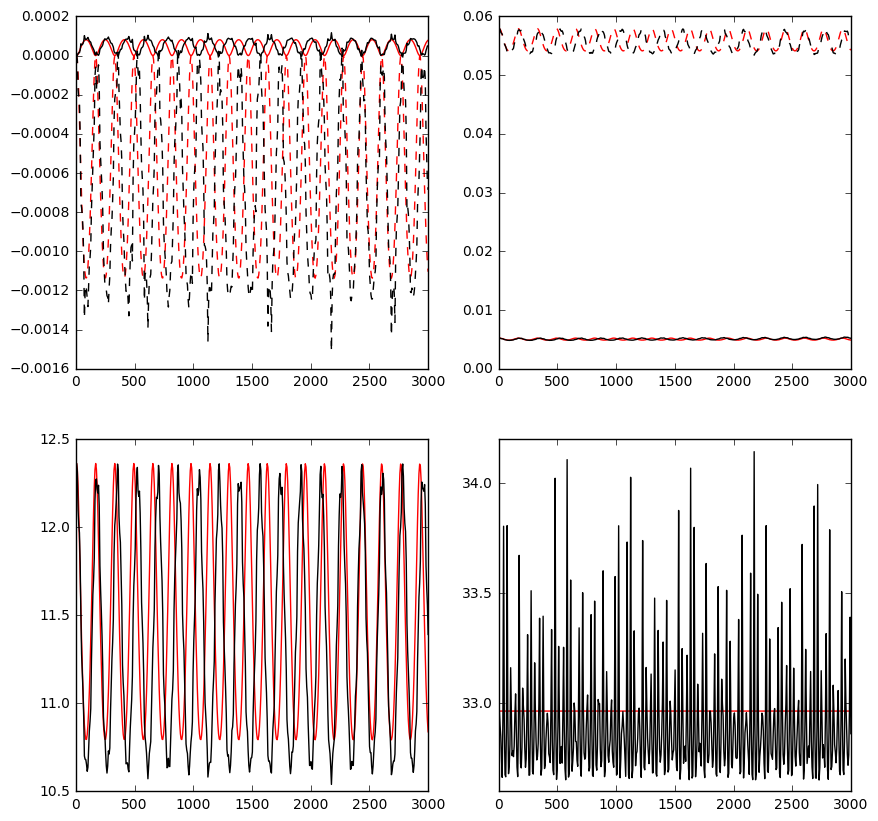

In [5]:
fig,ax=plt.subplots(2,2,figsize=(10,10))

ax[0,0].plot(times,(Psma[0]-Psma[0,0])/Psma[0,0],'r')
ax[0,0].plot(times,(Psma[1]-Psma[1,0])/Psma[1,0],'r--')
ax[0,0].plot(times,(Nsma[0]-Nsma[0,0])/Nsma[0,0],'k')
ax[0,0].plot(times,(Nsma[1]-Nsma[1,0])/Nsma[1,0],'k--')

ax[0,1].plot(times,Pecc[0],'r')
ax[0,1].plot(times,Pecc[1],'r--')
ax[0,1].plot(times,Necc[0],'k')
ax[0,1].plot(times,Necc[1],'k--')

ax[1,0].plot(times,PPhi,'r')
ax[1,0].plot(times,NPhi,'k')

ax[1,1].plot(times,PPhiprime,'r')
ax[1,1].plot(times,NPhiprime,'k')